## Bootcamp Capstone Project

### Objective
The goal of this project is to analyze patient demographic and medical data to identify key risk factors associated with stroke.
Stroke is a major cause of death and long-term disability. Early prediction can help healthcare providers intervene before severe outcomes occur.

This project includes:
- Data Cleaning
- Exploratory Data Analysis (EDA)
- 5–7 Visualizations
- Modeling
- Insights Summary

In [3]:

# Import Required Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set clean visualization style
sns.set(style="whitegrid")

# Display plots inline
%matplotlib inline

## 1. Load Dataset

The dataset contains patient information such as:
- Age
- Hypertension status
- Heart disease status
- Smoking history
- BMI
- Glucose level
- Stroke occurrence (Target Variable)

Stroke:
- 1 = Patient had a stroke
- 0 = No stroke

In [5]:
# Load the dataset

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# df.info()
# df.isnull().sum()
# df['stroke'].value_counts()

#display first 5 rows of the dataset
df.head()
# df.describe()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 2. Data Overview

We examine:
- Dataset shape
- Data types
- Missing values
- Stroke distribution

In [6]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Data information
df.info()

# Check missing values
df.isnull().sum()

# Stroke distribution
df["stroke"].value_counts()

# Percentage distribution
df["stroke"].value_counts(normalize=True) * 100

Dataset Shape: (5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

## 3. Data Cleaning

Cleaning steps:
- Remove 'id' column (not useful for analysis)
- Remove rare gender category ("Other")
- Fill missing BMI values using median

In [8]:
# Data Cleaning


# Drop ID column
df.drop(columns=["id"], inplace=True)

# Remove rare gender category
df = df[df["gender"] != "Other"]

# Fill missing BMI values with median
df["bmi"].fillna(df["bmi"].median(), inplace=True)

# Confirm missing values handled
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 4. Exploratory Data Analysis (EDA)

We now explore patterns between patient characteristics and stroke occurrence.

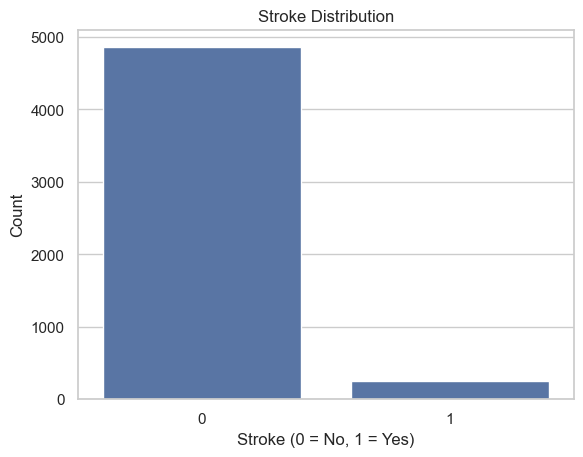

In [11]:
# Visualization 1: Stroke Distribution

sns.countplot(x="stroke", data=df)
plt.title("Stroke Distribution")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

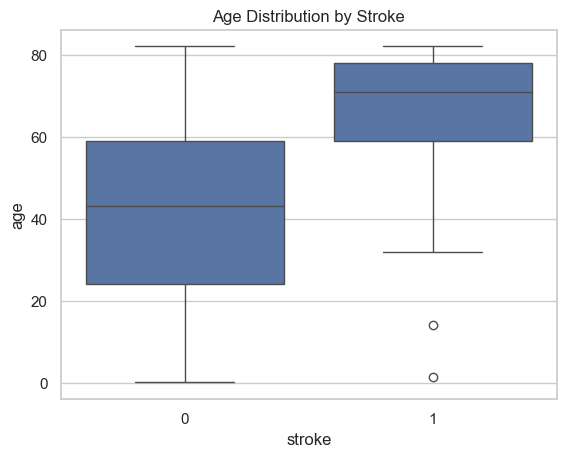

In [12]:
# Visualization 2: Age vs Stroke

sns.boxplot(x="stroke", y="age", data=df)
plt.title("Age Distribution by Stroke")
plt.show()

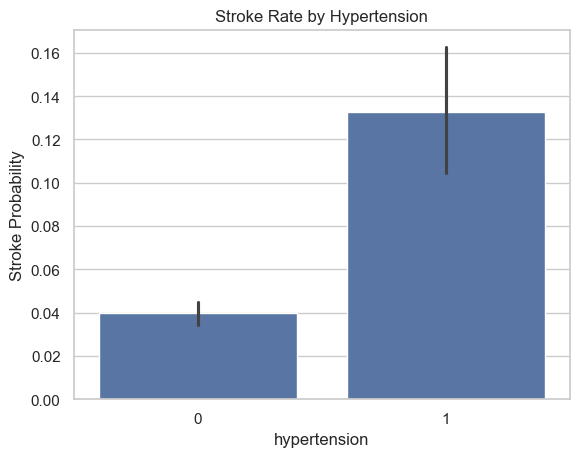

In [ ]:
# Visualization 3: Hypertension Impact

sns.barplot(x="hypertension", y="stroke", data=df)
plt.title("Stroke Rate by Hypertension")
plt.ylabel("Stroke Probability")
plt.show()

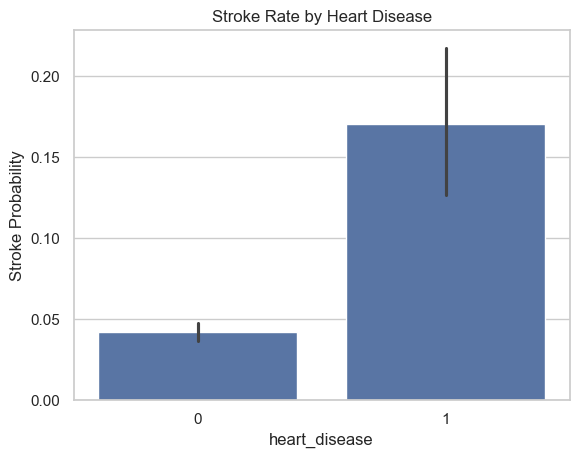

In [14]:
# Visualization 4: Heart Disease Impact


sns.barplot(x="heart_disease", y="stroke", data=df)
plt.title("Stroke Rate by Heart Disease")
plt.ylabel("Stroke Probability")
plt.show()

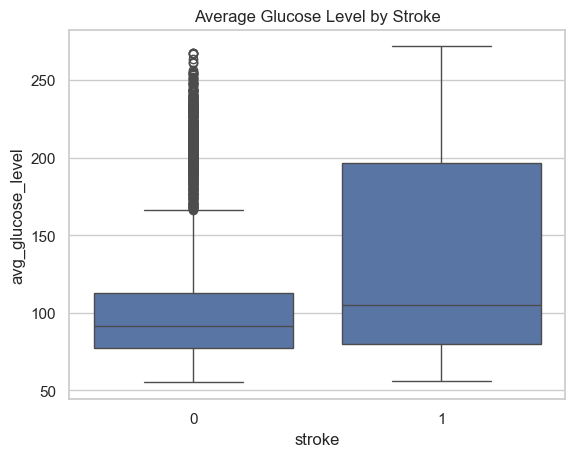

In [15]:

# Visualization 5: Glucose Level vs Stroke


sns.boxplot(x="stroke", y="avg_glucose_level", data=df)
plt.title("Average Glucose Level by Stroke")
plt.show()

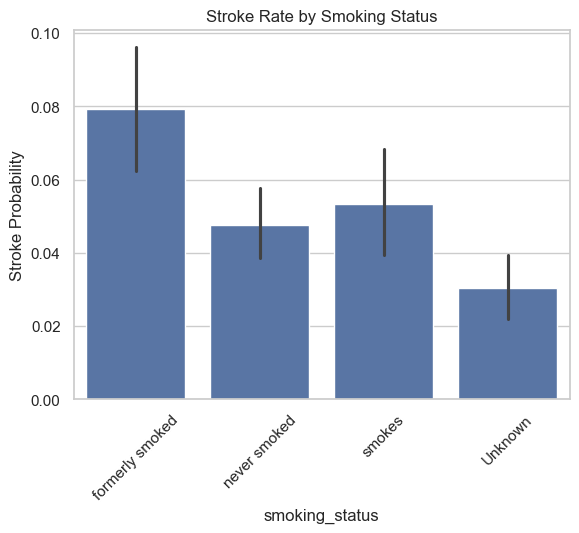

In [16]:

# Visualization 6: Smoking Status Impact


sns.barplot(x="smoking_status", y="stroke", data=df)
plt.xticks(rotation=45)
plt.title("Stroke Rate by Smoking Status")
plt.ylabel("Stroke Probability")
plt.show()

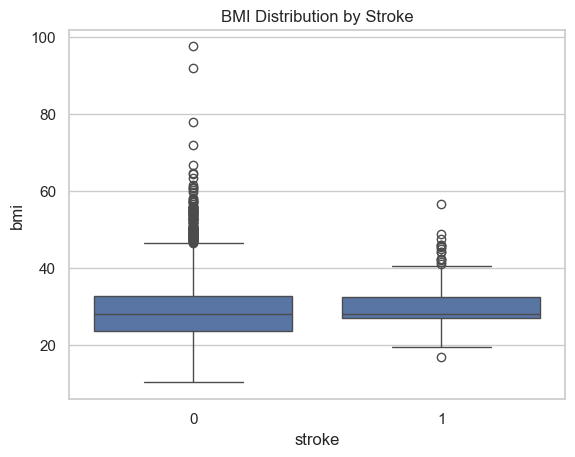

In [17]:

# Visualization 7: BMI Distribution by Stroke


sns.boxplot(x="stroke", y="bmi", data=df)
plt.title("BMI Distribution by Stroke")
plt.show()

## 5. Age Group Analysis (Feature Engineering)

To better understand risk trends, we categorize age into groups:
- Young
- Middle Age
- Senior
- Elderly

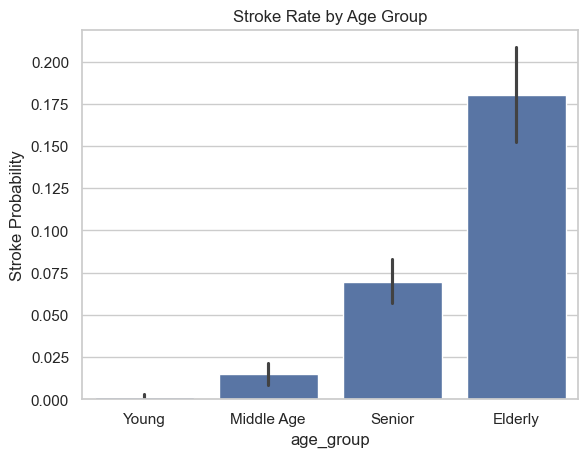

In [18]:
# Create Age Groups


df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 30, 50, 70, 100],
    labels=["Young", "Middle Age", "Senior", "Elderly"]
)

sns.barplot(x="age_group", y="stroke", data=df)
plt.title("Stroke Rate by Age Group")
plt.ylabel("Stroke Probability")
plt.show()

## 6. Key Insights & Recommendations

### Key Findings

1. Stroke cases represent a small percentage of the dataset (class imbalance).
2. Stroke risk increases significantly with age.
3. Patients with hypertension show much higher stroke rates.
4. Heart disease is strongly associated with stroke occurrence.
5. Higher average glucose levels are observed among stroke patients.
6. Smoking shows moderate association with stroke risk.

### Healthcare Recommendations

- Prioritize stroke screening for elderly patients.
- Monitor and manage hypertension aggressively.
- Control blood glucose levels in high-risk patients.
- Promote heart disease prevention programs.
- Encourage smoking cessation initiatives.

### Conclusion

Exploratory analysis reveals that age, hypertension, heart disease, and glucose levels are major contributors to stroke risk. Early intervention targeting these factors may reduce stroke occurrence.